
# **Proyecto 2: Precesión y el perihelio de Mercurio**


---
**Clase:** *Física computacional*

**Catedrático:** *MSc. Juan Diego Chang*


**Estudiante:** *Cindy Gatica Arriola*

**Registro Académico:** *201709692*

*Universidad de San Carlos de Guatemala*

*Escuela de Ciencias Físicas y Matemáticas*

---

Realizar una función de Runge-Kutta con la fuerza de la ecuación

\begin{align}
F_{i}=-\frac{GM_{S}M_M}{r^{2}}(1+\frac{α}{r^2}),
\end{align}

Definir también como posición inicial y velocidad inicial dada por

* $x_{0}=(1+e)a$,
* $y_{0}=0$
* $v^{x}_{0}=0$,
* $v^{y}_{0}= \sqrt(\frac{GM_S}{α}(\frac{1-e}{1+e}))$

Entonces, Mercurio se encuentra aquí inicialmente en el punto más lejano del Sol ya que a es el semieje mayor de Mercurio (α = 0,39UA) y $e$ = 0,206 su excentricidad y por lo tanto, la distancia ea es la distancia entre el Sol y el centro de la elipse. El semieje menor está definido por $b=a\sqrt(1-e^2)$. La velocidad inicial se calcula por la conservación del momentum angular y la conservación de la energía, entre el punto inicial y el punto (0, b).


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

alfa = 0.0008#1.1*10**(-8) #0.0008
a=0.39
exc = 0.206
GM_S = 4*np.pi**2
x0 = (1+exc)*a
vx0 = 0
y0 = 0
vy0 = math.sqrt((GM_S/a)*(1-exc)/(1+exc))
dt = 0.0001
N = 20000

def F(x, y, GM_S):
  r = np.sqrt(x**2 + y**2)
  F_x = -GM_S/r**3 *(1+(alfa/r**2))* x
  F_y = -GM_S/r**3 *(1+(alfa/r**2)) * y
  return F_x, F_y

def Runge_Kutta(x0, vx0, y0, vy0, dt, N):
  X = []
  Y = []
  VX = []
  VY = []
  Theta = []
  R_final = []
  DR_DT = []
  dtheta_p_dt_values = []
  x = x0
  y = y0
  vx = vx0
  vy = vy0


  for i in range(N):
    F_x, F_y = F(x, y, GM_S)
    k1_x = dt*vx
    k1_y = dt*vy
    R = np.sqrt((x + 0.5*k1_x)**2 + (y + 0.5*k1_y)**2)
    k3_x = dt*F_x
    k3_y = dt*F_y
    k2_x = dt*(vx + k3_x/2)
    k2_y = dt*(vy + k3_y/2)
    k4_x = -GM_S/R**3*(1+(alfa/R**2))*(x + 0.5*k1_x)*dt
    k4_y = -GM_S/R**3*(1+(alfa/R**2))*(y + 0.5*k1_y)*dt

    x = x + k2_x
    vx = vx + k4_x
    y = y + k2_y
    vy = vy + k4_y

   # Calcular el ángulo θ en radianes entre el vector de posición (x, y) y el eje x
    theta = np.arctan2(y, x)

  # Derivada d(theta_p)/dt usando la velocidad angular
    dtheta_p_dt = (x * vy - y * vx) / (x ** 2 + y ** 2)


    #encontrando dr/dt
    r = np.sqrt(x**2 + y**2)
    drdt = (x * vx + y * vy) / r

    X.append(x)
    Y.append(y)
    VX.append(vx)
    VY.append(vy)
    Theta.append(theta)
    R_final.append(r)
    DR_DT.append(drdt)
    dtheta_p_dt_values.append(dtheta_p_dt)


  return  X, Y, VX, VY, Theta, R_final, DR_DT, dtheta_p_dt_values

La tasa de precesión del perihelio de Mercurio es muy pequeño ya que α es muy débil. De hecho, no puede medirse numéricamente con un tiempo muy limitado.
Entonces vamos a tomar un valor grande de α=0.0008 $UA^2$. Trabajaremos también
con N = 20000 y Δt = 0,0001. Calcular la órbita con estos valores y un ángulo θ
entre el vector de posición de Mercurio y el eje horizontal como función del tiempo.

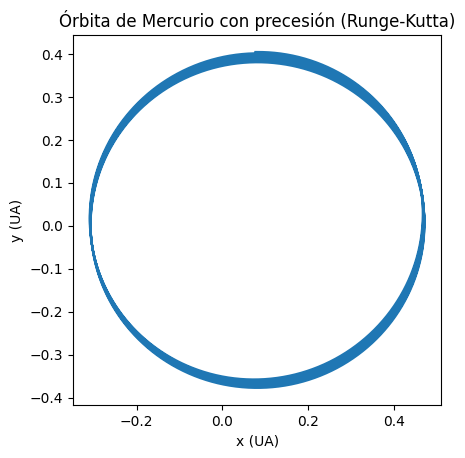

In [ ]:
x_runge_kutta, y_runge_kutta, vx_runge_kutta, vy_runge_kutta, theta_runge_kutta, r_runge_kutta, dr_dt_runge_kutta, dtheta_p_dt_values = Runge_Kutta(x0, vx0, y0, vy0, dt, N)

plt.plot(x_runge_kutta, y_runge_kutta)
plt.title('Órbita de Mercurio con precesión (Runge-Kutta)')
plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Calcular la distancia entre Mercurio y el Sol y su derivada en el tiempo dada por

$ \dfrac{dr}{dt}= \dfrac{xv_x + yv_y}{r} $

Esta derivada se anula cada vez que Mercurio alcanza su punto más alejado del
Sol o su punto más cercano (el perihelio).

La distancia promedio entre Mercurio y el Sol es: 0.39863365951218 UA


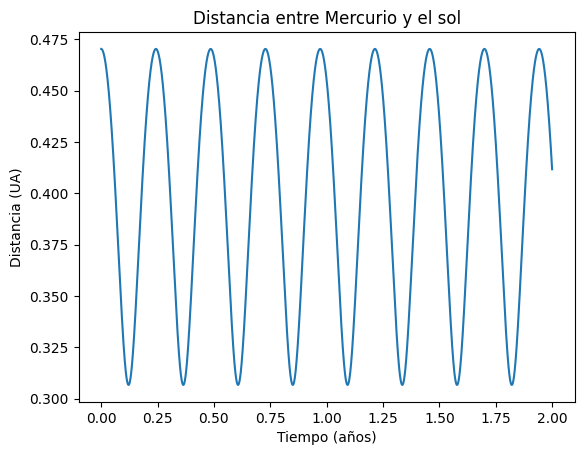

In [ ]:
#para calcular la distancia entre mercurio y el sol
print("La distancia promedio entre Mercurio y el Sol es:", sum(r_runge_kutta) / len(r_runge_kutta), "UA")
time = np.arange(0, N * dt, dt)
plt.plot(time, r_runge_kutta)
plt.title('Distancia entre Mercurio y el sol')
plt.xlabel('Tiempo (años)')
plt.ylabel('Distancia (UA)')
plt.show()

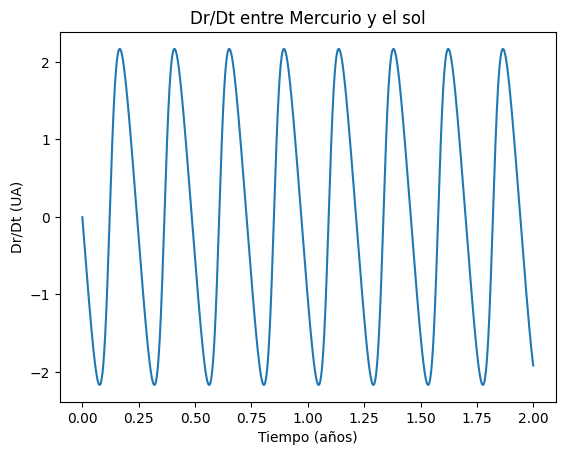

In [ ]:
#para calcular la derivada dr/dt
time = np.arange(0, N * dt, dt)
plt.plot(time, dr_dt_runge_kutta)
plt.title('Dr/Dt entre Mercurio y el sol')
plt.xlabel('Tiempo (años)')
plt.ylabel('Dr/Dt (UA)')
plt.show()


Dibujando nuevamente las gráficas tanto para la distancia recorrida como para la derivada $\dfrac{dr}{dt}$ en un mismo plano, se observa que los puntos en los cuales se alcanza el perihelio en la distancia coinciden con los puntos donde $\dfrac{dr}{dt}$ se hacen cero.

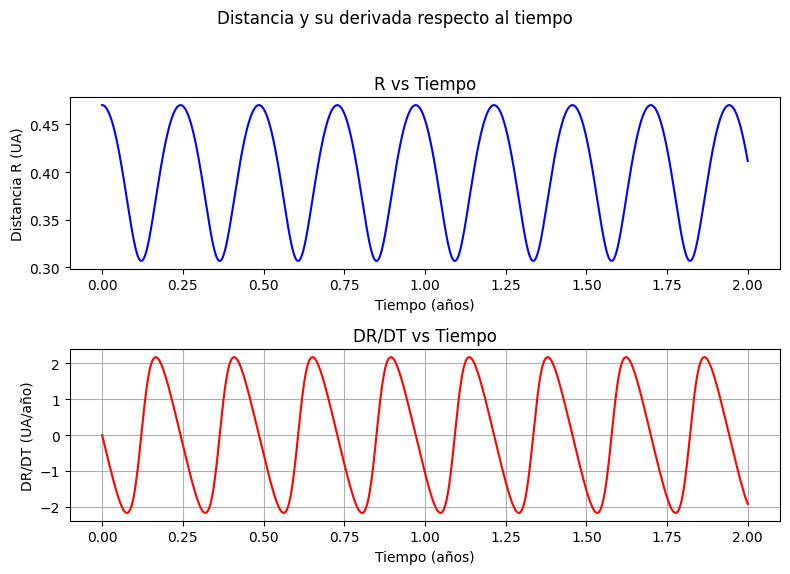

In [ ]:
## graficando ambas juntas
R_RK = r_runge_kutta
DRDT_RK = dr_dt_runge_kutta
time = np.arange(0, N * dt, dt)
# Crear una figura con dos subgráficas apiladas verticalmente
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
fig.suptitle('Distancia y su derivada respecto al tiempo')
ax1.plot(time, R_RK, color='blue')
ax1.set_title('R vs Tiempo')
ax1.set_xlabel('Tiempo (años)')
ax1.set_ylabel('Distancia R (UA)')
ax2.plot(time, DRDT_RK, color='red')
ax2.set_title('DR/DT vs Tiempo')
ax2.set_xlabel('Tiempo (años)')
ax2.set_ylabel('DR/DT (UA/año)')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.grid()
plt.show()

Trazar el ángulo $θ_p$ hecho entre el vector de posición de Mercurio y su punto más alejado y el eje horizontal como función del tiempo. Determinar la pendiente $\dfrac{dθ_p}{dt}$ que es precisamente la cantidad de la precesión del perihelio de Mercurio

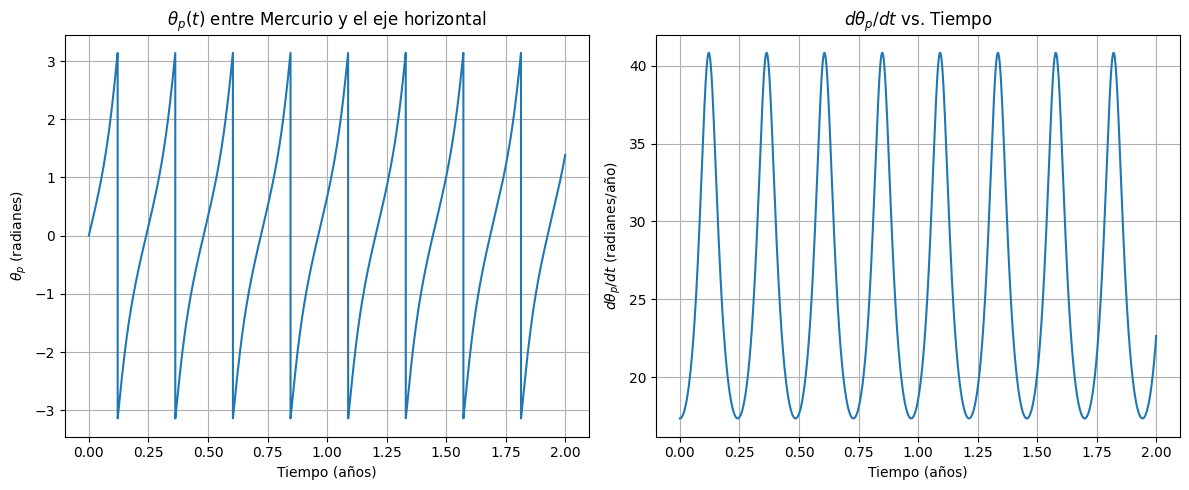

In [ ]:
# Graficar el ángulo θ como función del tiempo
time = np.arange(0, N * dt, dt)
# Gráficas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(time, theta_runge_kutta)
plt.title(r'$\theta_p(t)$ entre Mercurio y el eje horizontal')
plt.xlabel('Tiempo (años)')
plt.ylabel(r'$\theta_p$ (radianes)')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(time, dtheta_p_dt_values)
plt.title(r'$d\theta_p/dt$ vs. Tiempo')
plt.xlabel('Tiempo (años)')
plt.ylabel(r'$d\theta_p/dt$ (radianes/año)')
plt.tight_layout()
plt.grid()
plt.show()

3. Deducir a partir de estos resultados el valor de la cantidad de precesión para el valor $α = 1,1 × 10^{-8}UA^2$

In [ ]:
# Parámetros dados
a = 11209.2  # en grados/(año * α)
alpha_values = [0.0008, 0.001, 0.002, 0.004, 1.1e-8]  # Valores de α
precesion = []

# Cálculo de la precesión para cada valor de α en segundos de arco por siglo
for alpha in alpha_values:
    dtheta_dt_grados_por_anio = a * alpha
    dtheta_dt_segundos_por_siglo = dtheta_dt_grados_por_anio * 3600 * 100
    precesion.append(dtheta_dt_segundos_por_siglo)

# Resultados
for alpha, precesion_val in zip(alpha_values, precesion):
    print(f"α = {alpha:.8f} -> Precesión = {precesion_val:.4f} segundos de arco/siglo")


#El valor de la precesión para alfa= 1.1*10**{-8}
print("\n")
print("La cantidad de precesion para el valor de alfa= 1.1*10^(-8) es", 1.1*10**(-8)*11209.2 *3600*100 ,"segundos de arco/siglo" )

α = 0.00080000 -> Precesión = 3228249.6000 segundos de arco/siglo
α = 0.00100000 -> Precesión = 4035312.0000 segundos de arco/siglo
α = 0.00200000 -> Precesión = 8070624.0000 segundos de arco/siglo
α = 0.00400000 -> Precesión = 16141248.0000 segundos de arco/siglo
α = 0.00000001 -> Precesión = 44.3884 segundos de arco/siglo


La cantidad de precesion para el valor de alfa= 1.1*10^(-8) es 44.38843200000001 segundos de arco/siglo
